In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import astropy.units as u

import synthesizAR
from synthesizAR.atomic import EmissionModel
from synthesizAR.instruments import InstrumentHinodeEIS

%matplotlib inline

In [3]:
field = synthesizAR.Skeleton.restore('/data/datadrive2/ar_viz/seminar_poc/checkpoint/')

No HMI fits file supplied. A new HMI map object will not be created.
yt : [INFO     ] 2017-02-27 11:30:35,061 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-02-27 11:30:35,061 Parameters: domain_dimensions         = [96 96 46]
yt : [INFO     ] 2017-02-27 11:30:35,062 Parameters: domain_left_edge          = [ -2.89511786e+10   2.37893407e+10   4.40182588e+08]
yt : [INFO     ] 2017-02-27 11:30:35,064 Parameters: domain_right_edge         = [ -1.06601257e+10   3.93100982e+10   1.05643821e+10]
yt : [INFO     ] 2017-02-27 11:30:35,064 Parameters: cosmological_simulation   = 0.0


In [4]:
emiss_model = EmissionModel.restore('/data/datadrive2/ar_viz/seminar_poc/checkpoint_emiss_model/')

Fe VI psplups file not found
Fe VIII psplups file not found
Fe XVI psplups file not found
Fe XVII psplups file not found
Fe XXIV psplups file not found
Fe XXV psplups file not found


In [5]:
cube = synthesizAR.util.EISCube('/data/datadrive2/ar_viz/seminar_poc/Hinode_EIS/170-210/map_t000300.fits')

In [15]:
integrated_cube = cube.integrated_intensity

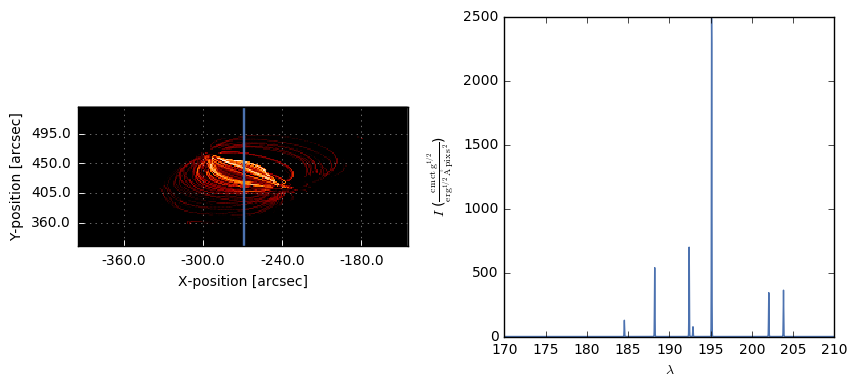

In [36]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121,projection=integrated_cube)
ax2 = fig.add_subplot(122)
integrated_cube.plot(axes=ax,title=False,norm=matplotlib.colors.SymLogNorm(0.1,vmin=50,vmax=10000))
integrated_cube.draw_rectangle(u.Quantity([-270*u.arcsec,integrated_cube.yrange[0]]),1*u.arcsec,
                               integrated_cube.yrange[1]-integrated_cube.yrange[0],color=sns.color_palette('deep')[0])
x,y0 = integrated_cube.data_to_pixel(-270*u.arcsec,integrated_cube.yrange[0])
x,y1 = integrated_cube.data_to_pixel(-270*u.arcsec,integrated_cube.yrange[1])
x,y0,y1 = int(x.value),int(y0.value),int(y1.value)
mean_profile = np.mean(cube.data[y0:y1,x,:],axis=0)
ax2.plot(cube.wavelength,mean_profile,color=sns.color_palette('deep')[0])
ax2.set_ylabel(r'$I$ ({})'.format(cube.data.unit.to_string(format='latex')))
ax2.set_xlabel(r'$\lambda$'.format(cube.wavelength.unit.to_string(format='latex')))
plt.tight_layout()
plt.savefig('../figures/eis_spectra.pdf',bbox_inches='tight')